# Indian Landmark Detection Using VGG-19

# Importing libraries

In [19]:
import os
# import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score 

# Defining data paths

In [18]:
train_path = r'archive - Copy\Indian-monuments\images\train'
test_path = r'archive - Copy\Indian-monuments\images\test'

# Converting image to pixels

Ajanta Caves


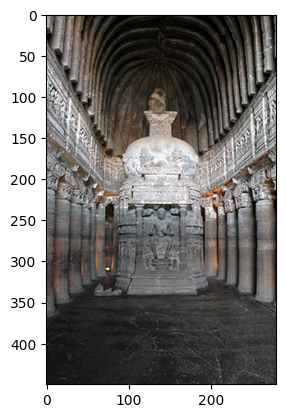

alai_darwaza


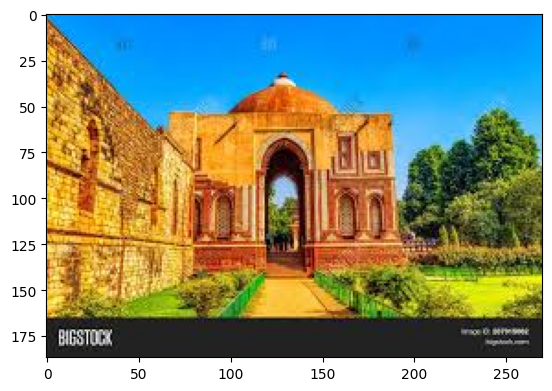

alai_minar


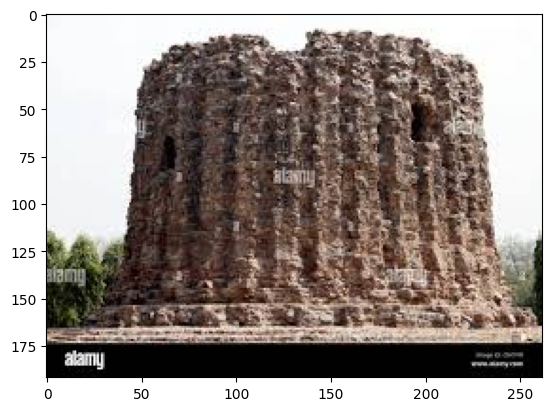

basilica_of_bom_jesus


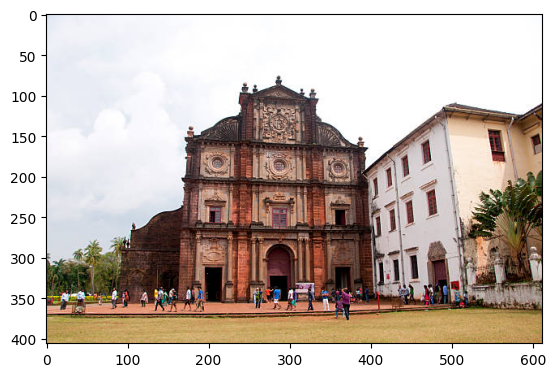

Charar-E- Sharif


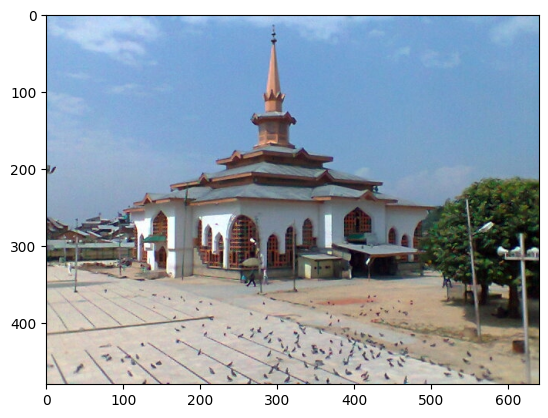

charminar


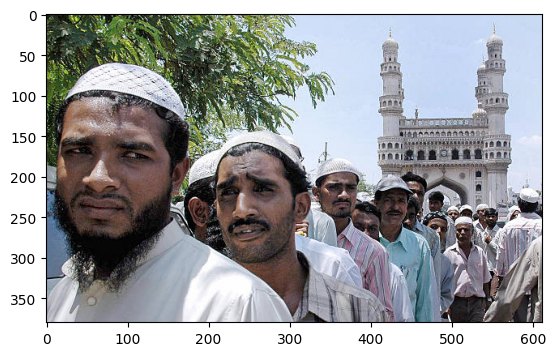

Chhota_Imambara


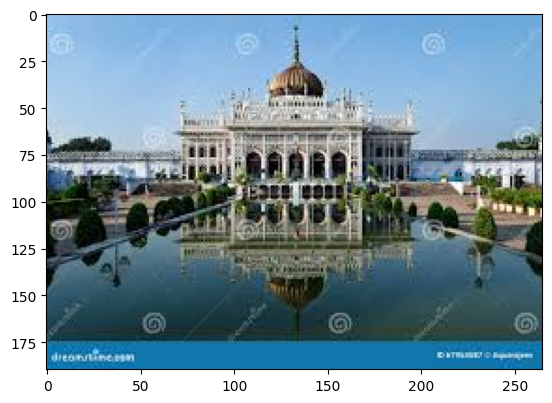

Ellora Caves


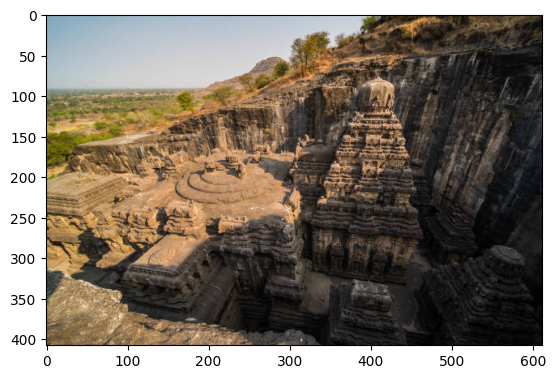

Fatehpur Sikri


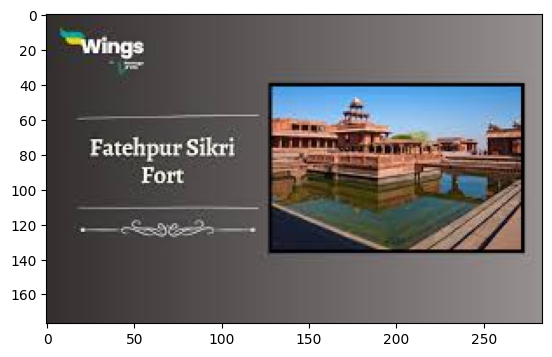

Gateway of India


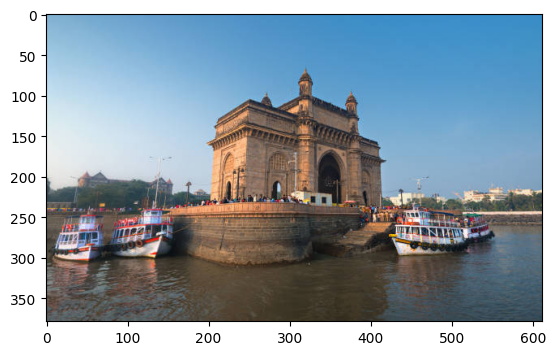

golden temple


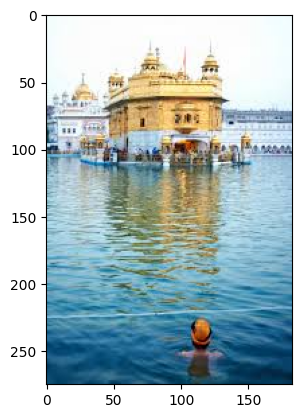

hawa mahal pics


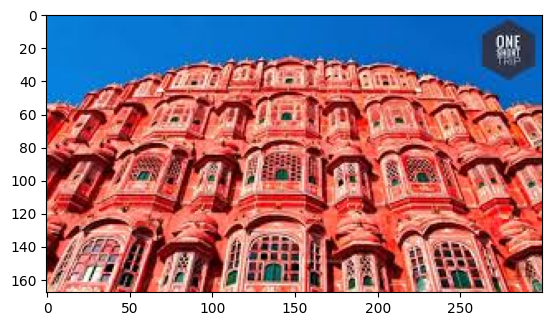

Humayun_s Tomb


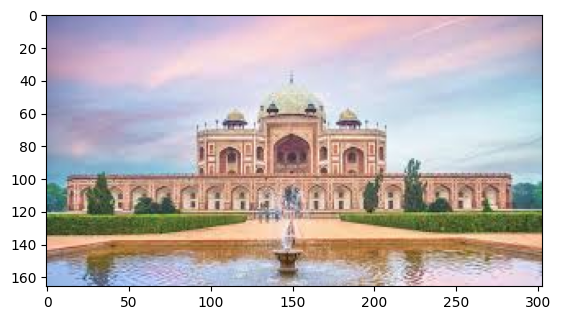

India gate pics


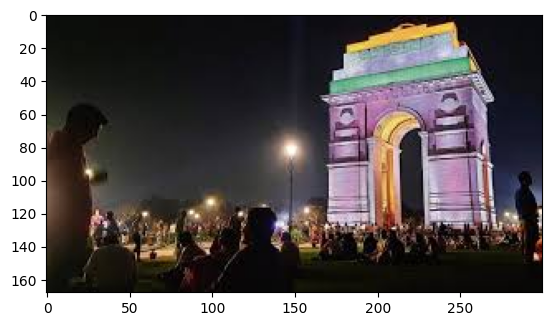

iron_pillar


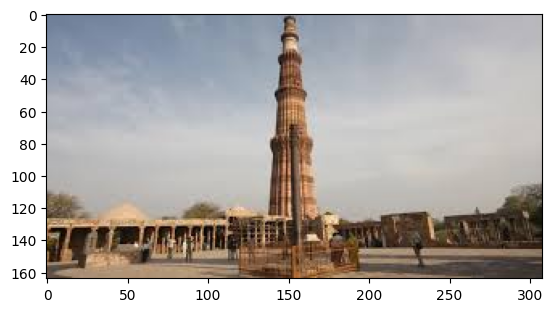

jamali_kamali_tomb


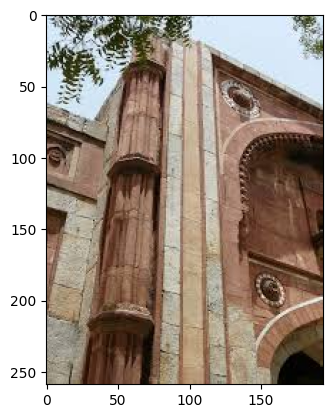

Khajuraho


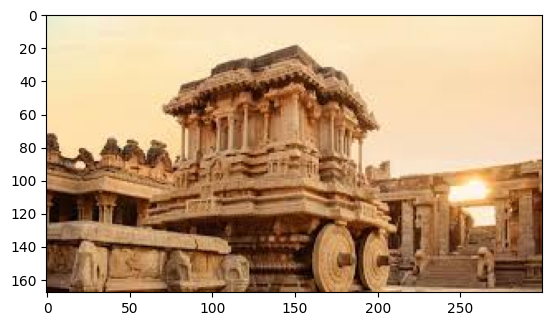

lotus_temple


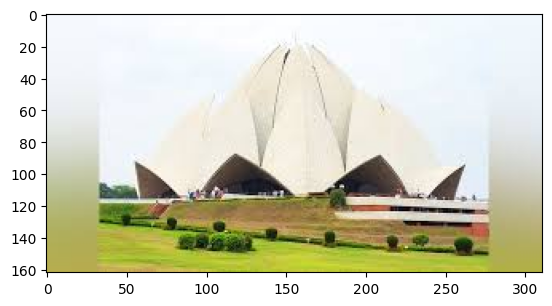

mysore_palace


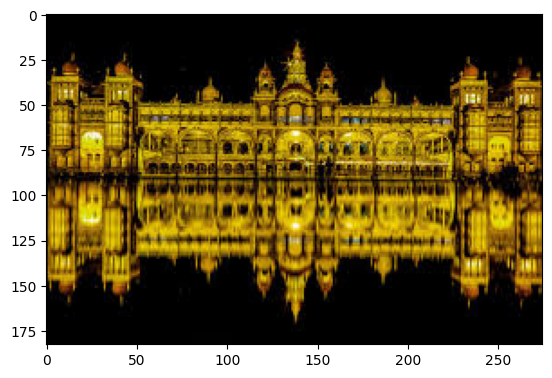

qutub_minar


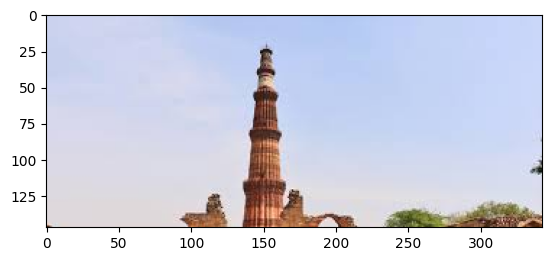

Sun Temple Konark


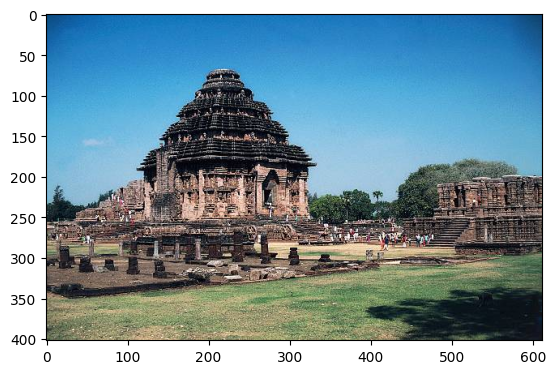

tajmahal


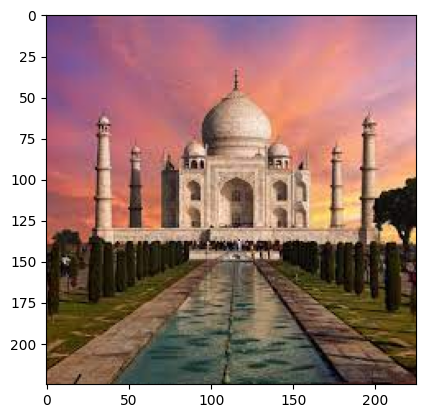

tanjavur temple


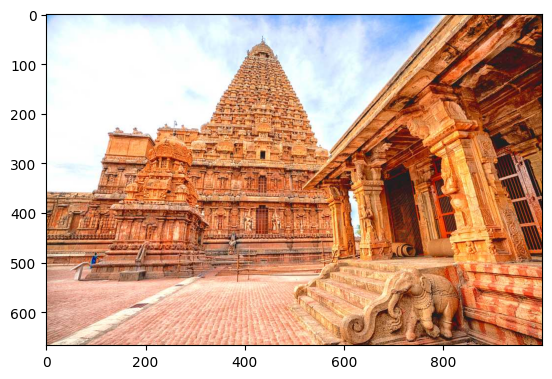

victoria memorial


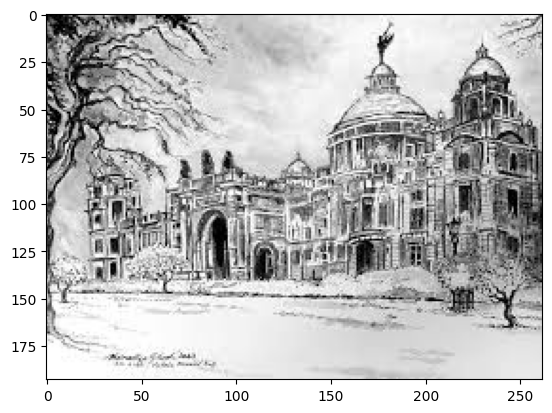

In [3]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(1):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [4]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder

        for img in os.listdir(sub_path):
            image_path=sub_path+"/"+img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr,size)
            
            data.append(img_arr)

    return data

In [5]:
size = (250,250)
# train = imagearray(train_path, size)


In [6]:
# test = imagearray(test_path, size)

# Normalization

In [7]:
# x_train = np.array(train)
# x_test = np.array(test)

# x_train.shape,x_test.shape

In [8]:
# x_train = x_train/255.0
# x_test = x_test/255.0


# Defining target variables

In [15]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [24]:
size = (250,250)

train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')

Found 7909 images belonging to 24 classes.
Found 1045 images belonging to 24 classes.


In [25]:
y_train = train_class.classes
y_test = test_class.classes
train_d=train_class
test_d=test_class
print(train_class)

In [26]:
train_class.class_indices

{'Ajanta Caves': 0,
 'Charar-E- Sharif': 1,
 'Chhota_Imambara': 2,
 'Ellora Caves': 3,
 'Fatehpur Sikri': 4,
 'Gateway of India': 5,
 'Humayun_s Tomb': 6,
 'India gate pics': 7,
 'Khajuraho': 8,
 'Sun Temple Konark': 9,
 'alai_darwaza': 10,
 'alai_minar': 11,
 'basilica_of_bom_jesus': 12,
 'charminar': 13,
 'golden temple': 14,
 'hawa mahal pics': 15,
 'iron_pillar': 16,
 'jamali_kamali_tomb': 17,
 'lotus_temple': 18,
 'mysore_palace': 19,
 'qutub_minar': 20,
 'tajmahal': 21,
 'tanjavur temple': 22,
 'victoria memorial': 23}

In [11]:
# y_train.shape,y_test.shape

In [29]:
import tensorflow as tf
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7909 files belonging to 24 classes.
Using 6328 files for training.


In [30]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7909 files belonging to 24 classes.
Using 1581 files for validation.


# VGG19 Model

In [14]:
# vgg = VGG19(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False)

In [15]:
# for layer in vgg.layers:
#     layer.trainable = False

# x = Flatten()(vgg.output)
# prediction = Dense(24, activation='softmax')(x)

# model = Model(inputs=vgg.input, outputs=prediction)
# model.summary()
# model.compile(
#   loss='sparse_categorical_crossentropy',
#   optimizer="adam",
#   metrics=['accuracy']
# )

In [49]:
import tensorflow as tf

model = Sequential([tf.keras.layers.BatchNormalization()])

pretrained_model= tf.keras.applications.ResNet50V2(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=24,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
# model.add(tf.keras.layers.Conv2D(filters=180,kernel_size=3,activation="relu",input_shape=[180,180,3]))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",input_shape=[178,178,3]))
# model.add(tf.keras.layers.MaxPool2D(strides=2,pool_size=2))
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=24, activation='softmax'))
# model.add(Flatten())
     

In [50]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])


In [18]:
# early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose = 1, patience = 5)

In [19]:
# ! pip install tensorflow_hub

In [20]:
# import tensorflow as tf
# import tensorflow_hub as hub
# from tensorflow.keras import layers

In [21]:

# def create_model(model_url, num_classes=10):
#   """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
#   Args:
#     model_url (str): A TensorFlow Hub feature extraction URL.
#     num_classes (int): Number of output neurons in output layer,
#       should be equal to number of target classes, default 10.

#   Returns:
#     An uncompiled Keras Sequential model with model_url as feature
#     extractor layer and Dense output layer with num_classes outputs.
#   """
#   # Download the pretrained model and save it as a Keras layer
#   feature_extractor_layer = hub.KerasLayer(model_url,
#                                            trainable=False, # freeze the underlying patterns
#                                            name='feature_extraction_layer',
#                                            input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
#   # Create our own model
#   model = tf.keras.Sequential([
#     feature_extractor_layer, # use the feature extraction layer as the base
#     Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
#   ])

#   return model

In [22]:
# resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [23]:
# ! pip install tensorflow

In [24]:
# IMAGE_SHAPE = (224, 224)
# BATCH_SIZE = 32
# resnet_model = create_model(resnet_url, num_classes=24)

# # Compile
# resnet_model.compile(loss='categorical_crossentropy',
#                      optimizer=tf.keras.optimizers.Adam(),
#                      metrics=['accuracy'])

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x00000263F3582B70> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

history = model.fit(x_train,y_train, validation_data = (x_test,y_test), epochs = 10, callbacks=[early_stop], batch_size = 3                    shuffle=True)

In [10]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model

In [35]:
import tensorflow as tf
base_model = ResNet50(include_top=False, weights='imagenet')
x= base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(1024, activation= "relu" )(x)
predictions = tf.keras.layers.Dense (24, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model. compile(optimizer='adam', loss='categorical_crossentropy', metrics = ["accuracy"])

# print(target)

In [52]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
# history = model.fit(
#   y_train,
#   validation_data=y_test,
#   epochs=10
# )
   

Epoch 1/10


AttributeError: 'NoneType' object has no attribute 'items'

In [ ]:
model.save("resnet.h5")


# Visualization

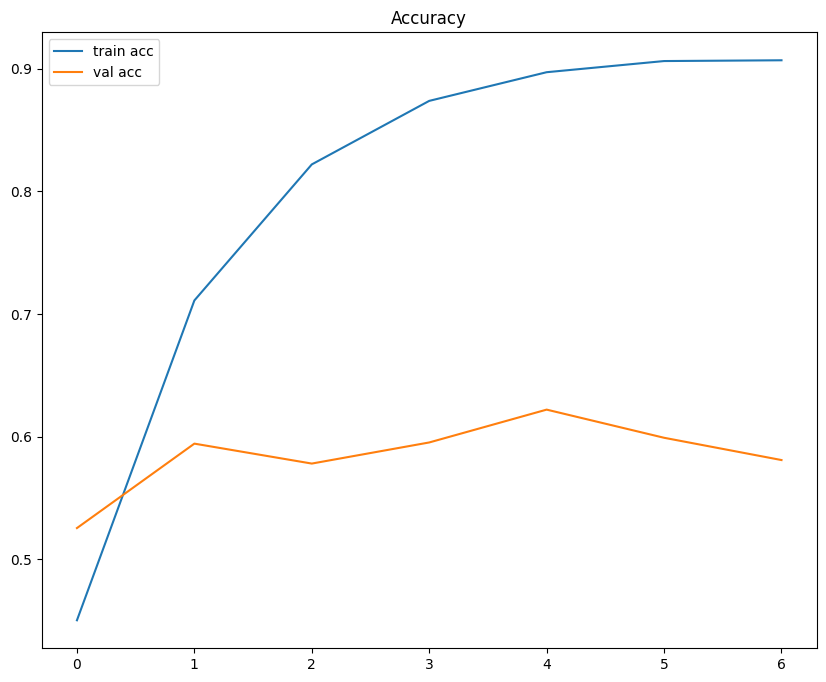

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

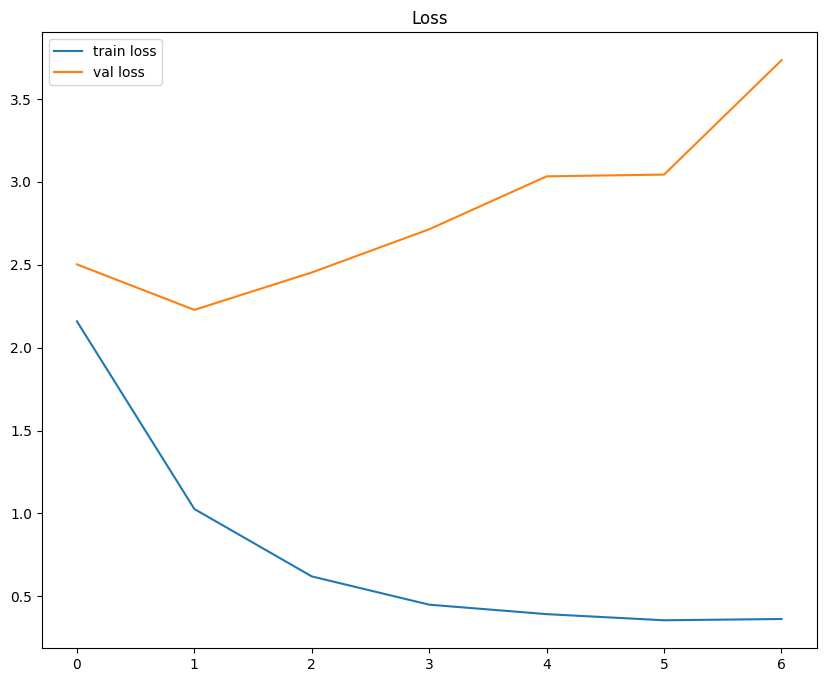

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

# Model Evaluation

In [ ]:
model.evaluate(x_test, y_test, batch_size=32)

33/33 ━━━━━━━━━━━━━━━━━━━━ 315s 9s/step - accuracy: 0.5528 - loss: 4.5700


[3.712730646133423, 0.5808612704277039]

In [ ]:
y_pred = model.predict(x_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 313s 9s/step


In [ ]:
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.85      0.83      0.84        35
           2       0.47      0.25      0.33        28
           3       0.21      0.33      0.25        21
           4       0.52      0.69      0.59        32
           5       0.37      0.42      0.39        26
           6       0.33      0.93      0.49        29
           7       1.00      0.36      0.53        83
           8       0.47      1.00      0.64        21
           9       0.00      0.00      0.00         8
          10       0.10      0.13      0.11        31
          11       0.81      0.30      0.44        97
          12       0.17      0.67      0.27         9
          13       0.90      0.45      0.60        60
          14       0.78      0.48      0.59        67
          15       0.37      0.56      0.44        43
          16       0.81      0.91      0.86        89
          17       0.59    

# Confusion Matrix

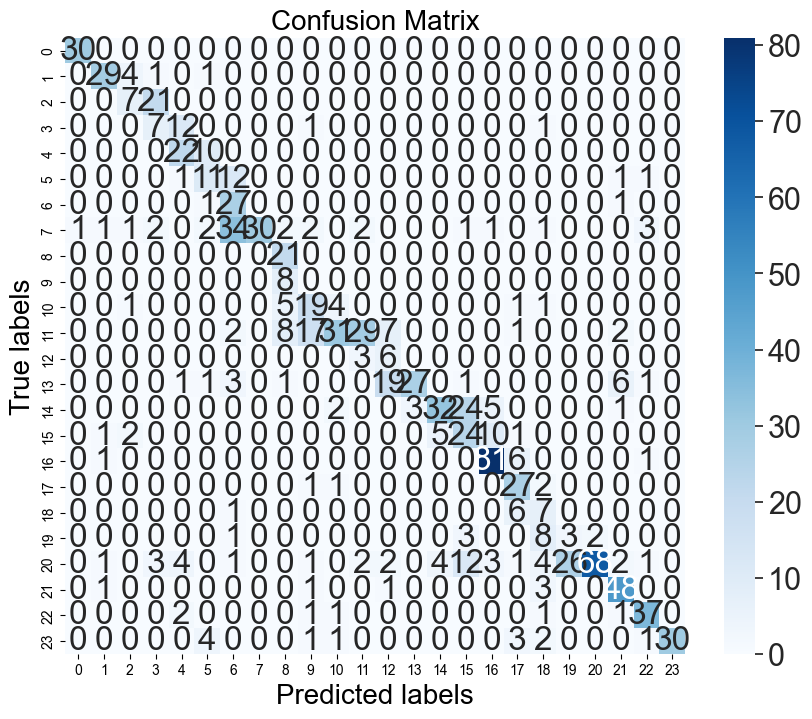

In [ ]:
cm = confusion_matrix(y_pred,y_test)

plt.figure(figsize=(10, 8))
ax = plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20);
ax.set_ylabel('True labels', fontsize=20); 
ax.set_title('Confusion Matrix', fontsize=20); 


In [ ]:
f1_score(y_test, y_pred, average='micro')

0.5808612440191387

In [ ]:
recall_score(y_test, y_pred, average='weighted')

0.5808612440191387

In [ ]:
precision_score(y_test, y_pred, average='micro')

0.5808612440191387

# Saving Model

In [ ]:
model.save("resent152(1).h5")